In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.iloc[:,0:8].head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [7]:
mapping={df.columns[0]:'sr_no',
         df.columns[1]:'gre',
         df.columns[2]:'toefl',
         df.columns[3]:'univ_rating',
         df.columns[4]:'sop',
         df.columns[5]:'lor',
         df.columns[6]:'cgpa',
         df.columns[7]:'research',
        df.columns[8]:'chance_of_admit'}
df=df.rename(columns=mapping)

In [8]:
df.columns

Index(['sr_no', 'gre', 'toefl', 'univ_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admit'],
      dtype='object')

In [9]:
print('univ_rating: ',df['univ_rating'].value_counts())
print('sop: ',df['sop'].value_counts())
print('lor: ',df['lor'].value_counts())
print('research: ',df['research'].value_counts())

univ_rating:  3    162
2    126
4    105
5     73
1     34
Name: univ_rating, dtype: int64
sop:  4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: sop, dtype: int64
lor:  3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: lor, dtype: int64
research:  1    280
0    220
Name: research, dtype: int64


## EDA

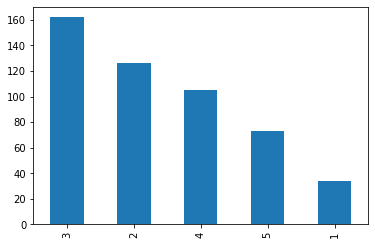

In [10]:
df['univ_rating'].value_counts().plot.bar()

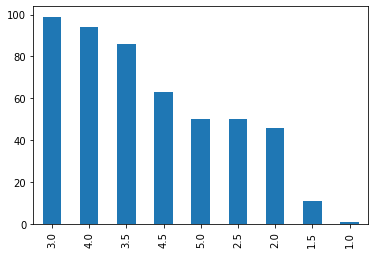

In [11]:
df['lor'].value_counts().plot.bar()

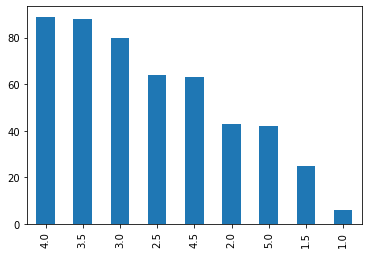

In [12]:
df['sop'].value_counts().plot.bar()

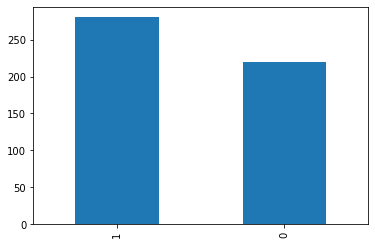

In [13]:
df['research'].value_counts().plot.bar()

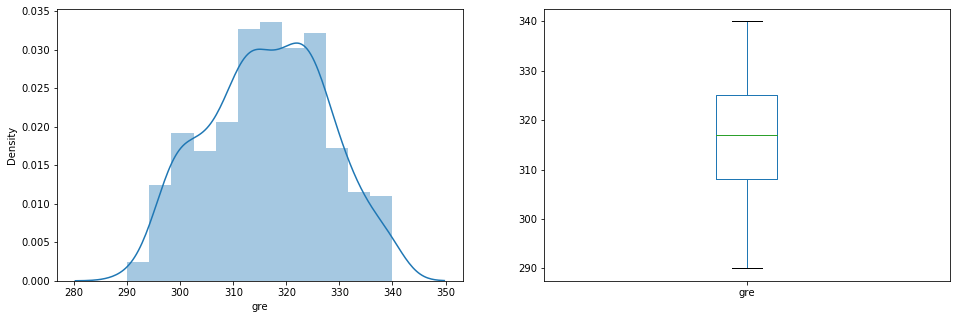

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['gre']);
plt.subplot(122)
df['gre'].plot.box(figsize=(16,5))
plt.show()

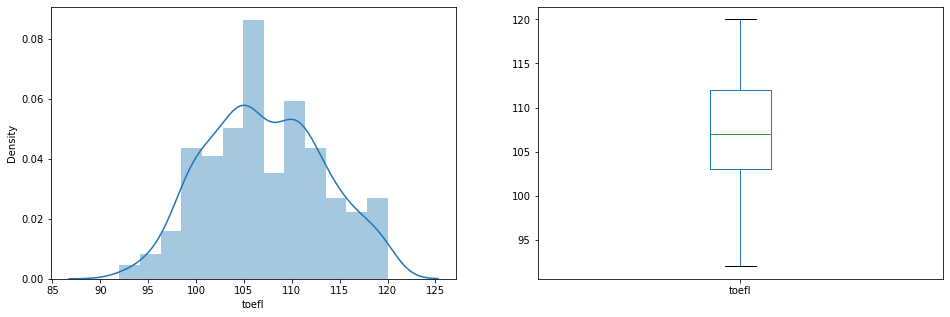

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['toefl']);
plt.subplot(122)
df['toefl'].plot.box(figsize=(16,5))
plt.show()

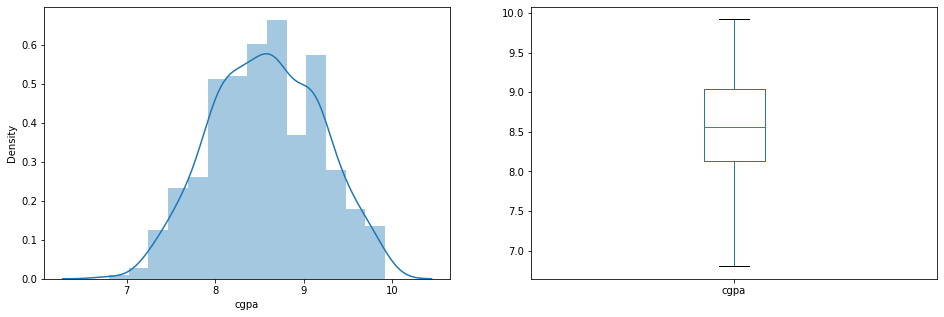

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['cgpa']);
plt.subplot(122)
df['cgpa'].plot.box(figsize=(16,5))
plt.show()

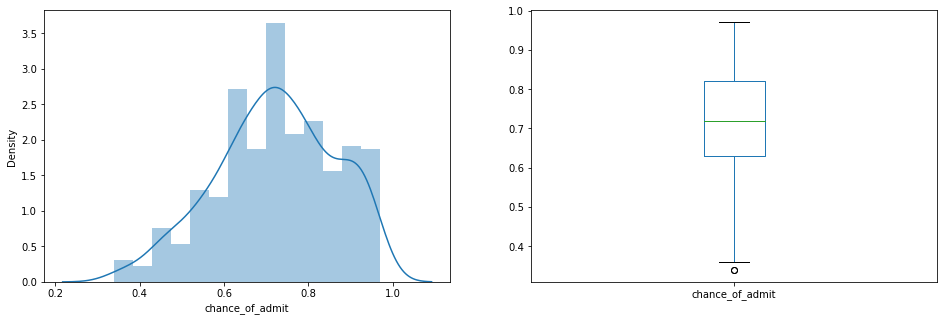

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['chance_of_admit']);
plt.subplot(122)
df['chance_of_admit'].plot.box(figsize=(16,5))
plt.show()

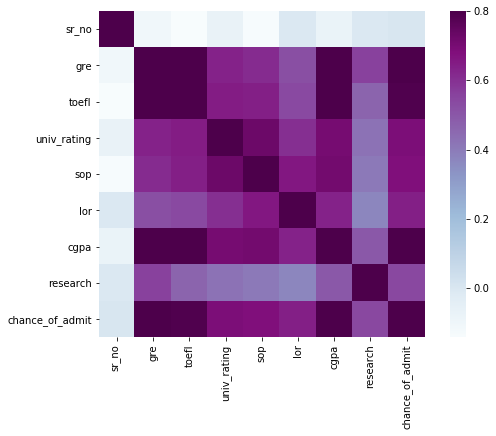

In [18]:
matrix=df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu");

In [19]:
matrix['chance_of_admit']

sr_no              0.008505
gre                0.810351
toefl              0.792228
univ_rating        0.690132
sop                0.684137
lor                0.645365
cgpa               0.882413
research           0.545871
chance_of_admit    1.000000
Name: chance_of_admit, dtype: float64

[]

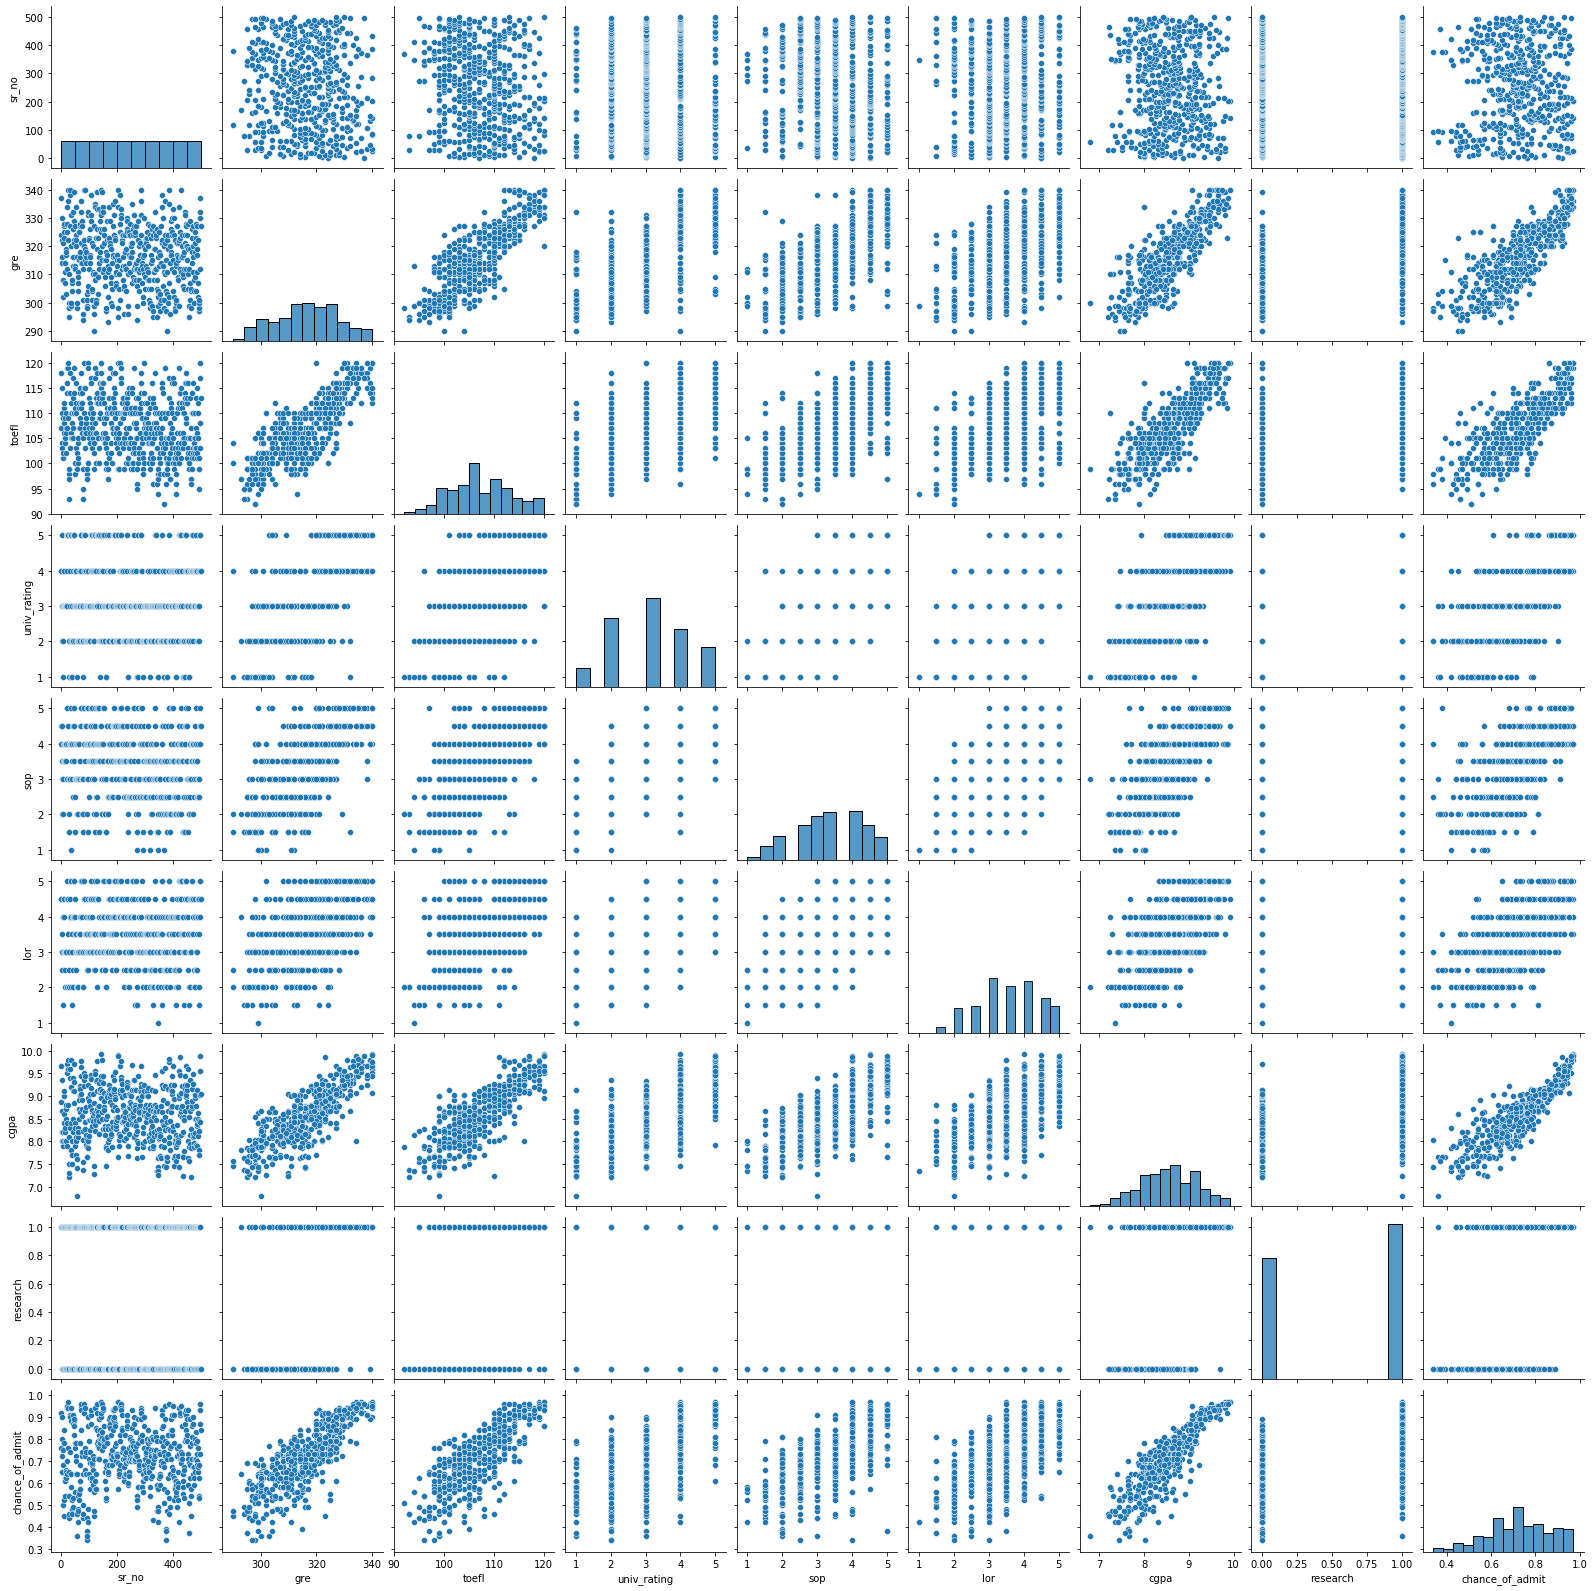

In [20]:
sns.pairplot(df)
plt.plot()

In [21]:
df=df.drop('sr_no',axis=1)

In [22]:
# making train - test dataset
X=df.iloc[:,0:7]
y=df.iloc[:,-1:]


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)

In [24]:
l_discrete=['univ_rating','research']
l_continuous=[ 'gre', 'toefl','sop', 'lor', 'cgpa']

In [25]:
x_train.head()

,gre,toefl,univ_rating,sop,lor,cgpa,research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1


## Model Building

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
y_pred_cv=lin_reg.predict(x_cv)
mean_squared_error(y_cv, y_pred_cv,squared=False)

0.058814104576507674

In [29]:
#y_pred_cv

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score: "+str(r2_score(y_cv,y_pred_cv)))
#print("Mean Absolute Percentage Error: ")
#mape(y_pred_cv,y_cv)

r2_score: 0.8208741703103734


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_cv)
    print(name, (np.sqrt(mean_squared_error(y_cv, predictions))))

Results...
DecisionTree : 0.09357884376289331
Linear Regression : 0.058814104576507674
RandomForest : 0.06632710004213964
KNeighbours : 0.08015765715139135
SVM : 0.08315555662531574
AdaBoostClassifier : 0.06708327657910267
GradientBoostingClassifier:  0.06473956053499079
Xgboost:  0.07177656771457142
CatBoost:  0.06436620526626563
Lasso:  0.11949273437569037
Ridge:  0.058889782096842286
BayesianRidge:  0.05897342940756974
ElasticNet:  0.09571820415469967
HuberRegressor:  0.06794188172505351


## Save the model to reuse it again

In [32]:
#import pickle
# open a file, where you ant to store the data
#file = open('graduateAdmission_LR.pkl', 'wb')

# dump information to that file
#pickle.dump(lin_reg, file)

#model_pk = open('graduateAdmission_LR.pkl','rb')
#LR_model = pickle.load(model_pk)
#metrics.r2_score(y_cv, y_prediction)

In [34]:
import pickle
pickle.dump(lin_reg, open('model_LR.pkl','wb'))
model_LR = pickle.load(open('model_LR.pkl','rb'))

In [35]:
y_prediction = model_LR.predict(x_cv)

In [36]:
print(model_LR.predict([[137,100,1,3.5,2.5,7.7,0]]))

[[0.23102156]]
